In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib as mpl
mpl.rcParams.update({"text.usetex":True})

In [123]:
df = pd.read_excel('HPF.xlsx')
print(df)

        f  Vin    Vout
0     100    2   0.627
1     200    2   1.248
2     300    2   1.855
3     400    2   2.448
4     500    2   2.998
5     600    2   3.529
6     700    2   4.026
7     800    2   4.445
8     900    2   4.897
9     950    2   5.240
10   1000    2   6.004
11   1200    2   6.484
12   1400    2   6.806
13   1500    2   6.864
14   1590    2   7.079
15   1650    2   7.198
16   1700    2   7.305
17   1800    2   7.498
18   1900    2   7.668
19   2000    2   7.824
20   2600    2   8.527
21   3500    2   9.105
22   4000    2   9.290
23   4500    2   9.426
24   5000    2   9.526
25   5500    2   9.940
26   6000    2   9.970
27   7000    2   9.960
28   8000    2   9.960
29  10000    2   9.980
30  15000    2  10.000
31  20000    2  10.000
32  25000    2  10.000
33  30000    2  10.000


In [124]:
Vi = np.array(df["Vin"])
Vo = np.array(df["Vout"])
fr = np.array(df["f"])
gain = 20*np.log10(Vo/Vi)
print(gain)
# dff = pd.DataFrame(Vo)
# dff.to_excel(excel_writer="vout.xlsx")

[-10.0752491   -4.09630821  -0.65372163   1.75562836   3.51603266
   4.93243325   6.0768755    6.93683539   7.77800217   8.36602583
   9.54821376  10.21626021  10.63723898  10.71094558  10.97883833
  11.12363693  11.25180449  11.47830881  11.67304217  11.84797692
  12.59532535  13.16499909  13.33971437  13.4659488   13.55761163
  13.92712777  13.95330325  13.94458686  13.94458686  13.96201091
  13.97940009  13.97940009  13.97940009  13.97940009]


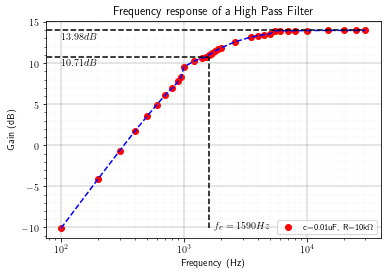

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.4")
ax.grid(which = "minor",linestyle = "--", linewidth="0.1")
ax.minorticks_on()
ax.scatter(fr,gain,color="red",label="c=0.01uF, R=10k$\Omega$")
ax.semilogx(fr,gain,ls="--",color="Blue")
ax.plot([1590, 1590],[-10.076,10.7109],ls="--",color="black")
ax.plot([0, 1590],[10.7109,10.7109],ls="--",color="black")
ax.plot([0, 30000],[13.97940009,13.97940009],ls="--",color="black")
ax.annotate(r"$f_{c}=1590 Hz$",xy=(1590,-10.076),xytext=(1750,-10.076))
ax.annotate(r"$13.98 dB$",xy=(100,13.97940009),xytext=(100,12.97940009))
ax.annotate(r"$10.71 dB$",xy=(100,10.7109),xytext=(100,9.7109))
plt.title("Frequency response of a High Pass Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.legend(loc='best',prop={'size':8})
plt.savefig('HPF.pdf')
plt.show()

In [146]:
df = pd.read_excel('LPF.xlsx')
print(df)

        f  Vin  Vout_c     Gain     power   Vout
0     100    2   9.979  19.9820  0.999100  9.979
1     200    2   9.921  19.9310  0.996550  9.921
2     300    2   9.825  19.8470  0.992350  9.825
3     400    2   9.696  19.7320  0.986600  9.696
4     500    2   9.539  19.5900  0.979500  9.539
5     600    2   9.354  19.4203  0.971015  9.354
6     700    2   9.152  19.2303  0.961515  9.152
7     800    2   8.932  19.0190  0.950950  8.932
8     900    2   8.700  18.7902  0.939510  8.700
9    1000    2   8.466  18.5540  0.927700  8.466
10   1400    2   7.495  17.4954  0.874770  7.495
11   1500    2   7.264  17.2230  0.861150  7.264
12   1590    2   7.064  16.9805  0.849025  7.064
13   2000    2   6.214  15.8680  0.793400  6.214
14   2500    2   5.363  14.5880  0.729400  5.363
15   3000    2   4.675  13.3950  0.669750  4.675
16   3500    2   4.132  12.3238  0.616190  4.132
17   4000    2   3.689  11.3384  0.566920  3.689
18   5000    2   3.029   9.6270  0.481350  3.029
19   6000    2   2.5

In [147]:
Vi = np.array(df["Vin"])
Vo = np.array(df["Vout"])
fr = np.array(df["f"])
gain = 20*np.log10(Vo/Vi)
print(gain)
# dff = pd.DataFrame(Vo)
# dff.to_excel(excel_writer="vout.xlsx")

[13.96114054 13.91050908 13.82605127 13.71125222 13.56945706 13.3993474
 13.20972032 12.99837437 12.76978514 12.53296537 11.47483283 11.2029168
 10.9604139   9.84682507  8.56755603  7.37503239  6.30260634  5.31757319
  3.60538555  2.10338856  0.88295242 -0.26456531 -6.10789602]


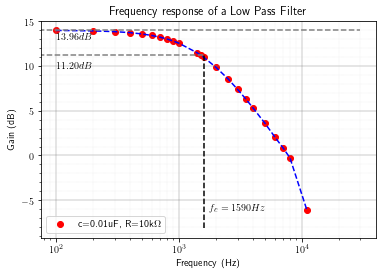

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="0.4")
ax.grid(which = "minor",linestyle = "--", linewidth="0.1")
ax.minorticks_on()
ax.scatter(fr,gain,color="red",label="c=0.01uF, R=10k$\Omega$")
ax.semilogx(fr,gain,ls="--",color="Blue")
ax.plot([1590, 1590],[-8.10789602,11.2029],ls="--",color="black")
ax.plot([-6.10789602, 1590],[11.2029,11.2029],ls="--",color="grey")
ax.plot([-6.10789602, 30000],[13.96114054,13.96114054],ls="--",color="grey")
ax.annotate(r"$f_{c}=1590 Hz$",xy=(1590,0),xytext=(1750,-6.10789602))
ax.annotate(r"$13.96 dB$",xy=(100,13.97940009),xytext=(100,12.97940009))
ax.annotate(r"$11.20 dB$",xy=(100,10.7109),xytext=(100,9.7109))
plt.title("Frequency response of a Low Pass Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.legend(loc='best',prop={'size':10})
plt.savefig('LPF.pdf')
plt.show()